## Using API's in python---short breif on procedure of Scraping Data 

#### Using nba_api to gather data around teams and games played using leaguegamefinder 
#### converting the dictionary to a data frame to ease the analysis 
#### analysing mean of game points when played againt toronto raptors at (home, away)

In [1]:
# installing nba_api
!pip install nba_api

                                              0.0/261.7 kB ? eta -:--:--
     -------------------------------------- 261.7/261.7 kB 8.1 MB/s eta 0:00:00
                                              0.0/62.6 kB ? eta -:--:--
     ---------------------------------------- 62.6/62.6 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [3]:
# importing module teams to get the required information about teams
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
nba_teams = teams.get_teams()

In [14]:
# first 3 teams displayed and there key:values pair
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [21]:
# making a dictionary which has keys as they key of original dictionary and has a list attached to each key
# we will be using this dictionary to store information for each team 
keys = nba_teams[0].keys()
{key:[] for key in keys}

{'id': [],
 'full_name': [],
 'abbreviation': [],
 'nickname': [],
 'city': [],
 'state': [],
 'year_founded': []}

In [22]:
# the dict_out has the information for all the teams for respective keys
def one_dict(nba_teams):
    key = nba_teams[0].keys()
    dict_out = {key:[] for key in keys}
    for _dict in nba_teams:
        for key, value in _dict.items():
            dict_out[key].append(value)
    return dict_out

In [25]:
# dict_nba_team contains information in a dictionary which we convert to data frame
dict_nba_team = one_dict(nba_teams)
df_nba_team = pd.DataFrame(dict_nba_team)

In [24]:
import pandas as pd

In [26]:
df_nba_team.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [27]:
df_nba_team.shape

(30, 7)

In [35]:
# filtering out for Warriors in the data frame  
df_warriors = df_nba_team[df_nba_team['nickname'] == 'Warriors']
df_warriors.reset_index()
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [41]:
# extarcting id for the warriors 
id_warriors = df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [42]:
#now using an inbuilt function for extracting data for games played 
from nba_api.stats.endpoints import leaguegamefinder

In [43]:
# passing the id_warriors to leaguegamefinder 
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.\
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>game finder</code>.

In [44]:
# using gamefinder has method get_data_frame to return a data frame
gamefinder.get_json()
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612744,GSW,Golden State Warriors,0022300560,2024-01-15,GSW @ MEM,L,241,107,...,0.900,7.0,38.0,45.0,28,4,6,19,25,-9.0
1,22023,1610612744,GSW,Golden State Warriors,0022300545,2024-01-13,GSW @ MIL,L,240,118,...,0.643,12.0,29.0,41.0,23,5,4,7,16,-11.0
2,22023,1610612744,GSW,Golden State Warriors,0022300536,2024-01-12,GSW @ CHI,W,240,140,...,0.733,13.0,31.0,44.0,39,7,4,3,16,9.0
3,22023,1610612744,GSW,Golden State Warriors,0022300525,2024-01-10,GSW vs. NOP,L,239,105,...,0.833,14.0,29.0,43.0,24,4,4,17,19,-36.0
4,22023,1610612744,GSW,Golden State Warriors,0022300504,2024-01-07,GSW vs. TOR,L,241,118,...,0.933,15.0,28.0,43.0,30,5,4,10,11,-15.0


In [45]:
games.shape

(3661, 28)

In [46]:
type(games)

pandas.core.frame.DataFrame

In [55]:
type(gamefinder)

nba_api.stats.endpoints.leaguegamefinder.LeagueGameFinder

In [49]:
# filtering for games against toronto (home, away)
games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_away = games[games['MATCHUP']=='GSW @ TOR']

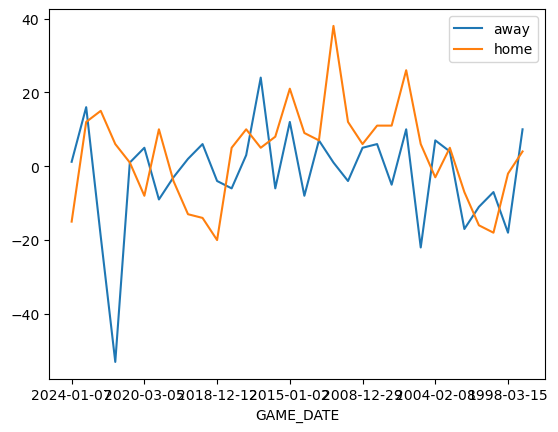

In [52]:
# plotting points won or lost in a match in home or away
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
ax.legend(['away','home'])
plt.show()

In [53]:
print('Mean of game points away',games_away['PLUS_MINUS'].mean())
print('Mean of game points home',games_home['PLUS_MINUS'].mean())

Mean of game points away -2.24375
Mean of game points home 3.375


In [54]:
print('Mean total game points away against TOR',games_away['PTS'].mean())
print('Mean total game points home against TOR',games_home['PTS'].mean())

Mean total game points away against TOR 102.71875
Mean total game points home against TOR 107.875
